# LAB 1: ANN and PyTorch

In this lab, you will start off by constructing a neural networks from scratch to get a stronger understanding of what is required to make neural networks work.

Then in the second part of the lab you will train a neural network (using PyTorch) to classify an image into one of two classes: "car" or "truck". The code for the neural networks 
you train will be written for you, and you are not (yet!) expected
to understand all provided code. However, by the end of the lab,
you should be able to:

1. Understand at a high level the training loop for a machine learning model.
2. Understand the distinction between training, validation, and test data.
3. The concepts of overfitting and underfitting.
4. Investigate how different hyperparameters, such as learning rate and batch size, affect the success of training.
5. Compare an ANN (aka Multi-Layer Perceptron) with a CNN.

### What to submit

Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

## Colab Link

Include a link to your colab file here

Colab Link: 

#PART A: Constructing a Neural Network [15 pt]

Before we get into using PyTorch to train our classifier we will go through the process of creating our neural network from scratch. We've seen in the tutorial how to build a 1-layer network, now we'll take it one step further to build a 2-layer network. This is an important exercise that everyone should attempt at least once to understand and truly appreciate the workings of neural networks.

## Part 0. Helper Functions

To help guide the construction we will use the iris dataset that was introduced in the tutorial. Provided are some helper code to get us started:

In [ ]:
# load "Iris_3class.csv" to Google Colab
from google.colab import files
uploaded = files.upload()

In [ ]:
import pandas as pd
raw_data = pd.read_csv("Iris_3class.csv", header = None)
raw_data.values.shape

(150, 5)

In [ ]:
import numpy as np
raw_data = raw_data.values

X_train = raw_data[:,:4]
y_train = raw_data[:,4:5].astype(int)
print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)

(150, 4) (150, 1)
float64 int64


Recall that the neural network output consists of several nodes, one for each output class. Since the labels are provided as integers we will need to convert them into one-hot vectors to match the neural network output format.

In [ ]:
#Convert array to one-hot encoding
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

In [ ]:
y_train = to_one_hot(y_train)
print(X_train.shape, y_train.shape)
print(X_train.dtype, y_train.dtype)

(150, 4) (150, 3)
float64 float64


In [ ]:
#verify one-hot encoding
y_train[0:5,:]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

### Part 1. Develop a 2-layer ANN [5 pt]
At its core a 2-layer neural network is just a few lines of code. Most of the complexity comes from setting up the training of the network.

Using vectorized form, set up the neural network training to use a cross-entropy loss function and determine the gradients with resepect to the layer 1 and layer 2 weights.

In [ ]:
# write code to create a 2-layer ANN in vectorized form

#define sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

def softmax(x):
    exp_scores = np.exp(x)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return probs 

# Reference
#https://stackoverflow.com/questions/47377222/what-is-the-problem-with-my-implementation-of-the-cross-entropy-function
def cross_en(predictions, targets, epsilon=1e-12):  
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = (1/N)*np.sum(np.multiply(-targets,np.log(predictions+1e-9)))
    return ce

def ann(W, X_train, y_train):

  num_hidden = 5
  num_features = 4
  num_outputs = 3

  #Weights
  w0 = W[:20].reshape(num_features, num_hidden)
  w1 = W[20:].reshape(num_hidden, num_outputs)
  
  #Feed forward
  layer0 = X_train
  layer1 = sigmoid(np.dot(layer0, w0))
  layer2 = np.dot(layer1, w1) 

  # softmax
  output = softmax(layer2)

  #****Back propagation using gradient descent****
  
  #cross-entropy loss
  error = cross_en(output, y_train, epsilon=1e-12)
  #print(error)
  
  #initialize gradients to zero 
  dw0, dw1 = np.zeros((num_features, num_hidden)), np.zeros((num_hidden, num_outputs))
  dW = np.array(list(dw0.flatten()) + list(dw1.flatten()))
  
  #calculating gradients to zero
  z_bar = output-y_train
  h_bar = np.dot(z_bar, w1.T)
  sigmoid_bar = layer1 * (1-layer1)
  G_bar = np.multiply(h_bar, sigmoid_bar)

  #determine gradients
  dw1 += np.dot(layer1.T, z_bar).reshape(5,3) 
  dw0 += np.dot(G_bar.T, X_train).reshape(4,5)  
  
  #combine gradients into one vector
  dW = np.array(list(dw0.flatten()) + list(dw1.flatten()))
  
  return (error, dW, output)


### Part 2. Train your neural network. How well does your network work on the iris dataset? [5 pt]

**Answer**

The neural network was trained on the dataset. After several tries of hyperparameter tuning the model achieved the error of only 0.09867. Which means it learnt very well. Upon comparing the output of the ANN with the actual labels the output matched very well except few sample points. 

In [ ]:
num_hidden = 5
num_features = 4
num_outputs = 3
  
#initialize weights
w0 = 2*np.random.random((num_features, num_hidden))-1
w1 = 2*np.random.random((num_hidden, num_outputs))-1

#combine weights into a single vector
W = np.array(list(w0.flatten()) + list(w1.flatten()))


#train network
n = 0.005
iterations = 10000
errors = []
for i in range(iterations):
  (error, dW, y_pred) = ann(W, X_train, y_train)
  W += -dW*n
  errors.append(error)

In [ ]:
error

0.0986716302731946

In [ ]:
#examine predictions on training data
np.round(y_pred, 1)

array([[1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. 

### Part 3. Validate that the gradients were computed correctly for the 2-layer neural network you developed. [5 pt]

**Answer**

The gradients were validated by first change the initial weights by a slight increment. Both weights were inputted into the ANN and the error was compared between both incremented weights. The error was very low for most of the weights; however, it was high for few. The reason for the error being high for few might be the nodes which the error pertains too are not required.

In [ ]:
#write code to numerical verify the gradients you calculated

num_hidden = 5
num_features = 4
num_outputs = 3
  
#initialize weights
w0 = 2*np.random.random((num_features, num_hidden)) - 1
w1 = 2*np.random.random((num_hidden, num_outputs)) - 1

#combine weights
W = np.array(list(w0.flatten()) + list(w1.flatten()))

#compute gradients analytically
(error, dW, y_pred) = ann(W, X_train, y_train)

#compute gradients numerically
dW_num = np.zeros((len(W),1))

for ind in range(len(W)):
  # Refernce: 
  #https://machinelearningjourney.com/index.php/2019/11/22/numerical-gradient-checking/
  #reset gradients
  We1 = np.array(list(w0.flatten()) + list(w1.flatten()))
  We2 = np.array(list(w0.flatten()) + list(w1.flatten()))
  
  #increment slightly
  We1[ind] = We1[ind] - 0.001
  We2[ind] = We2[ind] + 0.001
  
  #compute errors
  (error_e1, dW_e1, y_pred1) = ann(We1, X_train, y_train)
  (error_e2, dW_e2, y_pred2) = ann(We2, X_train, y_train)
  
  #obtain numerical gradients
  grad_num = (error_e2 - error_e1)/(0.002)
  
  #display difference between numerical and analytic gradients
  print(round(abs(grad_num - dW[ind]), 4), grad_num, dW[ind])


0.2137 -0.0014340160154890924 -0.21510158610645208
0.3399 0.1905266141295492 -0.1494172948732328
0.0578 0.0031470753797946394 -0.054604412931010426
0.0053 -0.0011282818327962296 -0.006459471202013441
28.5783 0.0006860459476620839 28.578996858676884
8.7702 -0.0009961171633654509 8.769220855022343
31.8618 0.05846141055604326 31.92024102433187
12.0159 0.002565763988882086 12.018497624519057
0.4724 -0.0003691228365187982 0.4720598255989784
0.3841 0.000745495589926648 0.3848638418289726
0.047 -0.00036402930531087563 0.046609478124521445
0.2156 0.21280175201021656 -0.002756107556855337
0.1696 0.00031073007605852965 -0.16924085460610816
0.054 -0.001330569960156236 -0.055368375860434214
0.1995 -0.00012987291708732585 -0.19958437055089678
0.0787 -4.306313228230607e-05 -0.07870754537654874
0.0228 0.08012332421164503 0.1029063769623603
0.1118 -1.8373859989040398e-05 0.11182401887082884
0.019 -0.0005247173390787729 -0.019481120653779188
0.0063 -4.2413400680452185e-05 -0.006362037899229863
0.0381 -

# PART B: Cars vs Trucks [35 pt]

In the second part of the lab we will see how we can use PyTorch to train a neural network to identify Cars and Trucks.

In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms


## Part 0. Helper Functions

We will be making use of the following helper functions. You will be asked to look
at and possibly modify some of these, but you are not expected to understand all of them.

You should look at the function names and read the docstrings. If you are curious, come back and explore the code *after* making some progress on the lab.

In [ ]:
###############################################################################
# Data Loading

def get_relevant_indices(dataset, classes, target_classes):
    """ Return the indices for datapoints in the dataset that belongs to the
    desired target classes, a subset of all possible classes.

    Args:
        dataset: Dataset object
        classes: A list of strings denoting the name of each class
        target_classes: A list of strings denoting the name of desired classes
                        Should be a subset of the 'classes'
    Returns:
        indices: list of indices that have labels corresponding to one of the
                 target classes
    """
    indices = []
    for i in range(len(dataset)):
        # Check if the label is in the target classes
        label_index = dataset[i][1] # ex: 9
        label_class = classes[label_index] # ex: 'truck'
        if label_class in target_classes:
            indices.append(i)
    return indices

def get_data_loader(target_classes, batch_size):
    """ Loads images of cars and trucks, splits the data into training, validation
    and testing datasets. Returns data loaders for the three preprocessed datasets.

    Args:
        target_classes: A list of strings denoting the name of the desired
                        classes. Should be a subset of the argument 'classes'
        batch_size: A int representing the number of samples per batch
    
    Returns:
        train_loader: iterable training dataset organized according to batch size
        val_loader: iterable validation dataset organized according to batch size
        test_loader: iterable testing dataset organized according to batch size
        classes: A list of strings denoting the name of each class
    """

    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    ########################################################################
    # The output of torchvision datasets are PILImage images of range [0, 1].
    # We transform them to Tensors of normalized range [-1, 1].
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    # Load CIFAR10 training data
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    # Get the list of indices to sample from
    relevant_indices = get_relevant_indices(trainset, classes, target_classes)
    
    # Split into train and validation
    np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
    np.random.shuffle(relevant_indices)
    split = int(len(relevant_indices) * 0.8) #split at 80%
    
    # split into training and validation indices
    relevant_train_indices, relevant_val_indices = relevant_indices[:split], relevant_indices[split:]  
    train_sampler = SubsetRandomSampler(relevant_train_indices)
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                               num_workers=1, sampler=train_sampler)
    val_sampler = SubsetRandomSampler(relevant_val_indices)
    val_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              num_workers=1, sampler=val_sampler)
    # Load CIFAR10 testing data
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    # Get the list of indices to sample from
    relevant_test_indices = get_relevant_indices(testset, classes, target_classes)
    test_sampler = SubsetRandomSampler(relevant_test_indices)
    test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                             num_workers=1, sampler=test_sampler)
    return train_loader, val_loader, test_loader, classes

###############################################################################
# Training
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def normalize_label(labels):
    """
    Given a tensor containing 2 possible values, normalize this to 0/1

    Args:
        labels: a 1D tensor containing two possible scalar values
    Returns:
        A tensor normalize to 0/1 value
    """
    max_val = torch.max(labels)
    min_val = torch.min(labels)
    norm_labels = (labels - min_val)/(max_val - min_val)
    return norm_labels

def evaluate(net, loader, criterion):
    """ Evaluate the network on the validation set.

     Args:
         net: PyTorch neural network object
         loader: PyTorch data loader for the validation set
         criterion: The loss function
     Returns:
         err: A scalar for the avg classification error over the validation set
         loss: A scalar for the average loss function over the validation set
     """
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0
    for i, data in enumerate(loader, 0):
        inputs, labels = data
        labels = normalize_label(labels)  # Convert labels to 0/1
        outputs = net(inputs)
        loss = criterion(outputs, labels.float())
        corr = (outputs > 0.0).squeeze().long() != labels
        total_err += int(corr.sum())
        total_loss += loss.item()
        total_epoch += len(labels)
    err = float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)
    return err, loss

###############################################################################
# Training Curve
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

## Part 1. Visualizing the Data [5 pt]

We will make use of some of the CIFAR-10 data set, which consists of 
colour images of size 32x32 pixels belonging to 10 categories. You can
find out more about the dataset at https://www.cs.toronto.edu/~kriz/cifar.html

For this assignment, we will only be using the car and truck categories. 
We have included code that automatically downloads the dataset the 
first time that the main script is run.

In [ ]:
# This will download the CIFAR-10 dataset to a folder called "data"
# the first time you run this code.
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["car", "truck"], 
    batch_size=1) # One image per batch

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### Part (a) -- 1 pt

Visualize some of the data by running the code below.
Include the visualization in your writeup.

(You don't need to submit anything else.)

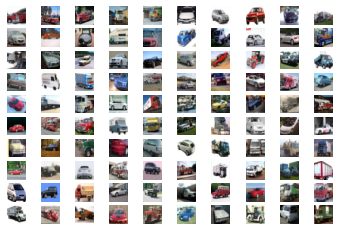

In [ ]:
import matplotlib.pyplot as plt

k = 0
for images, labels in train_loader:
    # since batch_size = 1, there is only 1 image in `images`
    image = images[0]
    # place the colour channel at the end, instead of at the beginning
    img = np.transpose(image, [1,2,0])
    # normalize pixel intensity values to [0, 1]
    img = img / 2 + 0.5
    plt.subplot(10, 10, k+1)
    plt.axis('off')
    plt.imshow(img)

    k += 1
    if k > 99:
        break

### Part (b) -- 2 pt

How many training examples do we have for the combined `car` and `truck` classes? 
What about validation examples? 
What about test examples?

**Answer**

There are 4000 training examples for cars and 4000 training examples for trucks, therefore 8000 total training examples. For validation, there are 1000 examples for cars and 1000 examples of trucks, total 2000 examples. Similarly, for test, there are 1000 examples for cars and 1000 examples of trucks, total 2000 examples.

### Part (c) -- 2pt

Why do we need a validation set when training our model? What happens if we judge the 
performance of our models using the training set loss/error instead of the validation
set loss/error?

**Answer**

Validation is required to judge the performance of the model during training. While we are training the model, the model could overfit the training data and build a very complex model which results in very low loss and error. This is not good for generalization of the model. Having a validation set, helps us to prevent that. With validation we can check on the performance of the model loss/error and make sure the model does not over or under fit. 

## Part 2. Training [10 pt]

We define two neural networks, a `LargeNet` and `SmallNet`.
We'll be training the networks in this section.

You won't understand fully what these networks are doing until
the next few classes, and that's okay. For this assignment, please
focus on learning how to train networks, and how hyperparameters affect
training.

In [ ]:
class LargeNet(nn.Module):
    def __init__(self):
        super(LargeNet, self).__init__()
        self.name = "large"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 5 * 5, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [ ]:
class SmallNet(nn.Module):
    def __init__(self):
        super(SmallNet, self).__init__()
        self.name = "small"
        self.conv = nn.Conv2d(3, 5, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc = nn.Linear(5 * 7 * 7, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv(x)))
        x = self.pool(x)
        x = x.view(-1, 5 * 7 * 7)
        x = self.fc(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

In [ ]:
small_net = SmallNet()
large_net = LargeNet()

### Part (a) -- 1pt

The methods `small_net.parameters()` and `large_net.parameters()`
produces an iterator of all the trainable parameters of the network.
These parameters are torch tensors containing many scalar values. 

We haven't learned how how the parameters in these high-dimensional
tensors will be used, but we should be able to count the number
of parameters. Measuring the number of parameters in a network is
one way of measuring the "size" of a network.

What is the total number of parameters in `small_net` and in
`large_net`? (Hint: how many numbers are in each tensor?)

**Answer Small_net**

Total number of parameters in Small net is equal to (5x3x3x3) + 5 + (245x1) + 1 = 386.
This is also verified by the for loop calculation below which sums the parameters which required grads.


In [ ]:
for param in small_net.parameters():
    print(param.shape)

torch.Size([5, 3, 3, 3])
torch.Size([5])
torch.Size([1, 245])
torch.Size([1])


In [ ]:
small_net_total_params = sum(p.numel() for p in small_net.parameters() if p.requires_grad)
print(small_net_total_params)

386


**Answer Large_net**

Total number of parameters in Small net is equal to (5x3x5x5) + 5 + (10x5x5x5) + 10 + (250x32) + 32 + (1x32) + 1 = 9705.
This is also verified by the for-loop calculation below which sums the parameters which required grads.

In [ ]:
for param in large_net.parameters():
    print(param.shape)

torch.Size([5, 3, 5, 5])
torch.Size([5])
torch.Size([10, 5, 5, 5])
torch.Size([10])
torch.Size([32, 250])
torch.Size([32])
torch.Size([1, 32])
torch.Size([1])


In [ ]:
large_net_total_params = sum(p.numel() for p in large_net.parameters() if p.requires_grad)
print(large_net_total_params)

9705


### The function train_net

The function `train_net` below takes an untrained neural network (like `small_net` and `large_net`) and
several other parameters. You should be able to understand how this function works.
The figure below shows the high level training loop for a machine learning model:

![alt text](https://github.com/UTNeural/Lab2/blob/master/Diagram.png?raw=true)

In [ ]:
def train_net(net, batch_size=64, learning_rate=0.01, num_epochs=30):
    ########################################################################
    # Train a classifier on cars vs trucks
    target_classes = ["car", "truck"]
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader, val_loader, test_loader, classes = get_data_loader(
            target_classes, batch_size)
    ########################################################################
    # Define the Loss function and optimizer
    # The loss function will be Binary Cross Entropy (BCE). In this case we
    # will use the BCEWithLogitsLoss which takes unnormalized output from
    # the neural network and scalar label.
    # Optimizer will be SGD with Momentum.
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    ########################################################################
    # Set up some numpy arrays to store the training/test loss/erruracy
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)
    ########################################################################
    # Train the network
    # Loop over the data iterator and sample a new batch of training data
    # Get the output from the network, and optimize our loss function.
    start_time = time.time()
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            # Get the inputs
            inputs, labels = data
            labels = normalize_label(labels) # Convert labels to 0/1
            # Zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass, backward pass, and optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()
            # Calculate the statistics
            corr = (outputs > 0.0).squeeze().long() != labels
            total_train_err += int(corr.sum())
            total_train_loss += loss.item()
            total_epoch += len(labels)
        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i+1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)
        print(("Epoch {}: Train err: {}, Train loss: {} |"+
               "Validation err: {}, Validation loss: {}").format(
                   epoch + 1,
                   train_err[epoch],
                   train_loss[epoch],
                   val_err[epoch],
                   val_loss[epoch]))
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    # Write the train/test loss/err into CSV file for plotting later
    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

### Part (b) -- 1pt

The parameters to the function `train_net` are hyperparameters of our neural network.
We made these hyperparameters easy to modify so that we can tune them later on. 

What are the default values of the parameters `batch_size`, `learning_rate`, 
and `num_epochs`?

**Answer**

Default values of the parameters are as following:

Batch_Size = 64

Learning_Rate = 0.01

Num_epochs = 30

### Part (c) -- 1 pt

What files are written to disk when we call `train_net` with `small_net`, and train for 5 epochs? Provide a list
of all the files written to disk, and what information the files contain.

In [ ]:
train_net(small_net, batch_size=64, learning_rate=0.01, num_epochs=5)

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch 1: Train err: 0.380125, Train loss: 0.6398739495277405 |Validation err: 0.347, Validation loss: 0.626265300437808
Epoch 2: Train err: 0.317125, Train loss: 0.5931134517192841 |Validation err: 0.3205, Validation loss: 0.5893806591629982
Epoch 3: Train err: 0.2895, Train loss: 0.5626362805366516 |Validation err: 0.2695, Validation loss: 0.5399615550413728
Epoch 4: Train err: 0.245875, Train loss: 0.5082704925537109 |Validation err: 0.235, Validation loss: 0.4788114055991173
Epoch 5: Train err: 0.21725, Train loss: 0.468982483625412 |Validation err: 0.2215, Validation loss: 0.4510131161659956
Finished Training
Total time elapsed: 17.62 seconds


**Answer**

Five model files one for each epoch, containing the parameters and model hyperparameters are saved into the file directory. The names of these files are:

1) model_small_bs64_lr0.01_epoch0

2) model_small_bs64_lr0.01_epoch1

3) model_small_bs64_lr0.01_epoch2

4) model_small_bs64_lr0.01_epoch3

5) model_small_bs64_lr0.01_epoch4

In addition of the model it also saved four csv files containing the training loss, training error, validation loss and validation error for the last epoch. The names of the files are as following: 

1) model_small_bs64_lr0.01_epoch4_train_err.csv

2) model_small_bs64_lr0.01_epoch4_train_loss.csv

3) model_small_bs64_lr0.01_epoch4_val_err.csv

4) model_small_bs64_lr0.01_epoch4_val_loss.csv


### Part (d) -- 2pt

Train both `small_net` and `large_net` using the function `train_net` and its default parameters.
The function will write many files to disk, including a model checkpoint (saved values of model weights) 
at the end of each epoch.

If you are using Google Colab, you will need to mount Google Drive 
so that the files generated by `train_net` gets saved. We will be using
these files in part (d).
(See the Google Colab tutorial for more information about this.)

Report the total time elapsed when training each network. Which network took longer to train?
Why?

**Answer**

Both Small_net and Large_net were ran and the model weights were saved in the google storage. Upon running the models, the large_net took longer to run (approx 115.7 sec). The small_net took a little bit shorter time of approx 102.9 sec.



In [ ]:
# Since the function writes files to disk, you will need to mount
# your Google Drive. If you are working on the lab locally, you
# can comment out this code.

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_net(small_net, batch_size=64, learning_rate=0.01, num_epochs=30)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.198, Train loss: 0.44227773547172544 |Validation err: 0.215, Validation loss: 0.455131895840168
Epoch 2: Train err: 0.19075, Train loss: 0.42567756485939023 |Validation err: 0.191, Validation loss: 0.42277994379401207
Epoch 3: Train err: 0.183125, Train loss: 0.4117078719139099 |Validation err: 0.1855, Validation loss: 0.4059676881879568
Epoch 4: Train err: 0.182, Train loss: 0.4103155707120895 |Validation err: 0.184, Validation loss: 0.4092636052519083
Epoch 5: Train err: 0.17175, Train loss: 0.3943568756580353 |Validation err: 0.189, Validation loss: 0.3981865793466568
Epoch 6: Train err: 0.170375, Train loss: 0.39221653425693515 |Validation err: 0.1915, Validation loss: 0.42034032940864563
Epoch 7: Train err: 0.165875, Train loss: 0.3830153555870056 |Validation err: 0.182, Validation loss: 0.3926306483335793
Epoch 8: Train err: 0.1585, Train loss: 0.3724959686994553 |Validation err: 0.1

In [ ]:
train_net(large_net, batch_size=64, learning_rate=0.01, num_epochs=30)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.458375, Train loss: 0.6893311667442322 |Validation err: 0.3635, Validation loss: 0.673980450257659
Epoch 2: Train err: 0.36125, Train loss: 0.6365034046173096 |Validation err: 0.353, Validation loss: 0.6330949943512678
Epoch 3: Train err: 0.324125, Train loss: 0.5976358065605164 |Validation err: 0.2995, Validation loss: 0.5726419379934669
Epoch 4: Train err: 0.260625, Train loss: 0.5269969711303711 |Validation err: 0.23, Validation loss: 0.4828507360070944
Epoch 5: Train err: 0.213375, Train loss: 0.45945801043510437 |Validation err: 0.185, Validation loss: 0.42397011164575815
Epoch 6: Train err: 0.192125, Train loss: 0.42584982538223265 |Validation err: 0.189, Validation loss: 0.41600494366139174
Epoch 7: Train err: 0.16825, Train loss: 0.38811644196510314 |Validation err: 0.179, Validation loss: 0.40847206953912973
Epoch 8: Train err: 0.159, Train loss: 0.3717250933647156 |Validation err

### Part (e) - 2pt

Use the function `plot_training_curve` to display the trajectory of the 
training/validation error and the training/validation loss.
You will need to use the function `get_model_name` to generate the
argument to the `plot_training_curve` function.

Do this for both the small network and the large network. Include both plots
in your writeup.

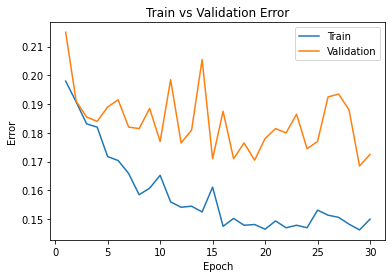

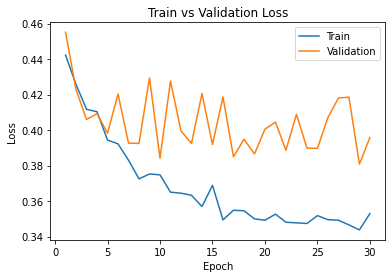

In [ ]:
small_model_path = get_model_name("small", batch_size=64, learning_rate=0.01, epoch=29)
plot_training_curve(small_model_path)

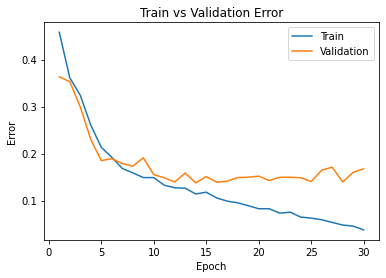

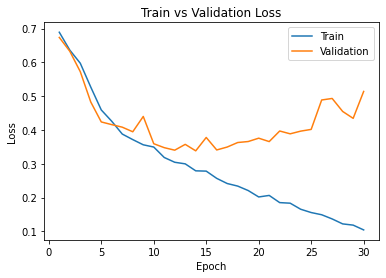

In [ ]:
large_model_path = get_model_name("large", batch_size=64, learning_rate=0.01, epoch=29)
plot_training_curve(large_model_path)

### Part (f) - 3pt

Describe what you notice about the training curve.
How do the curves differ for `small_net` and `large_net`?
Identify any occurences of underfitting and overfitting.

**Answer**

Training curves for small_net has a very rough pattern to them. Which means the small number of weights are being dramatically changed which is resulting in spikes. The Training curve for large_net has smooth lines which means large number of weights are being changed but its not a dramatic change. Other than that, the, small_net is achieving 0.4 loss for validation and 0.34 for training data. The large_net is achieving 0.4 for validation and 0.1 for training. The validation loss for both small and large net is the same, which means they have similar performance. 

The large_net is being overfit as the training error is very small and the validation error is increasing after 15 epochs. Whereas for small_net the training error is still decreeing and the validation error also seems like is decreeing and has not started to go up yet which means it’s not overfitting and it’s still underfitting.


## Part 3. Optimization Parameters [4 pt]

For this section, we will work with `large_net` only.

### Part (a) - 1pt

Train `large_net` with all default parameters, except set `learning_rate=0.001`.
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *lowering* the learning rate.

**Answer**

The large_net was retrained with learning rate of 0.001. The model took little longer than the previous large_net model. It took 118.58 seconds to train, in the last run it took 115.77 seconds. The training curve were plotted for this run. With lower learning rate the model seems to be underfitting as neither the training data or the validating data have reached the minimum loss and error values. This can be resolved by running the model for longer epochs. 

In [ ]:
# Note: When we re-construct the model, we start the training
# with *random weights*. If we omit this code, the values of
# the weights will still be the previously trained values.
large_net = LargeNet()

In [ ]:
train_net(large_net, batch_size=64, learning_rate=0.001, num_epochs=30)

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.4585, Train loss: 0.6922090911865234 |Validation err: 0.4145, Validation loss: 0.6918484680354595
Epoch 2: Train err: 0.404, Train loss: 0.6912762837409974 |Validation err: 0.401, Validation loss: 0.6909310147166252
Epoch 3: Train err: 0.39125, Train loss: 0.6897973504066467 |Validation err: 0.3825, Validation loss: 0.6891596242785454
Epoch 4: Train err: 0.391, Train loss: 0.6871493883132934 |Validation err: 0.379, Validation loss: 0.6860428061336279
Epoch 5: Train err: 0.37275, Train loss: 0.6819084930419922 |Validation err: 0.3725, Validation loss: 0.6794121749699116
Epoch 6: Train err: 0.367, Train loss: 0.6722611665725708 |Validation err: 0.3745, Validation loss: 0.6701584309339523
Epoch 7: Train err: 0.367375, Train loss: 0.6595345559120178 |Validation err: 0.3785, Validation loss: 0.6627401951700449
Epoch 8: Train err: 0.36425, Train loss: 0.6492524642944336 |Validation err: 0.3765, 

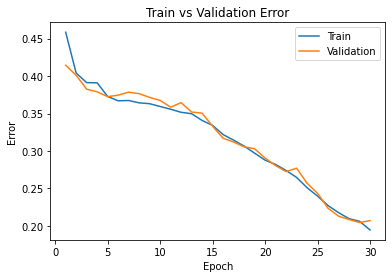

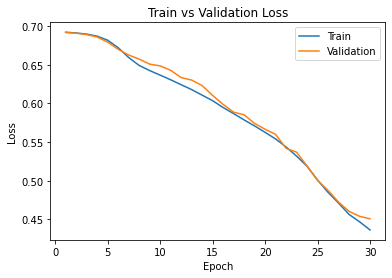

In [ ]:
large_model_path = get_model_name("large", batch_size=64, learning_rate=0.001, epoch=29)
plot_training_curve(large_model_path)

### Part (b) - 1pt

Train `large_net` with all default parameters, except set `learning_rate=0.1`. 
Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the learning rate.

**Answer**

The large_net was retrained with learning rate of 0.1. The model took less time than the previous large_net models. It took 115.02 seconds and 118.58 seconds in the previous model runs. The training curve were plotted for this run. With larger learning rate the model seems to be overfitting as both the training data and the validating data first reached minimum and then shot back to very high error and loss. High learning rate makes the model take longer jumps which makes the model learn faster but it might jump into a wrong valley for the gradient decent. This can be resolved by running the model for shorter epochs or decreasing the learning rate. 

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.3435, Train loss: 0.6152465670108795 |Validation err: 0.2655, Validation loss: 0.5401884317398071
Epoch 2: Train err: 0.26275, Train loss: 0.5457514839172364 |Validation err: 0.2255, Validation loss: 0.47185863088816404
Epoch 3: Train err: 0.205125, Train loss: 0.4577759726047516 |Validation err: 0.196, Validation loss: 0.42472241446375847
Epoch 4: Train err: 0.18375, Train loss: 0.42987853920459745 |Validation err: 0.193, Validation loss: 0.4498207103461027
Epoch 5: Train err: 0.182875, Train loss: 0.4176621789932251 |Validation err: 0.1765, Validation loss: 0.3949774377979338
Epoch 6: Train err: 0.1775, Train loss: 0.407295166015625 |Validation err: 0.218, Validation loss: 0.47349493484944105
Epoch 7: Train err: 0.15425, Train loss: 0.36420914459228515 |Validation err: 0.1665, Validation loss: 0.3992267334833741
Epoch 8: Train err: 0.143125, Train loss: 0.34258134818077085 |Validation er

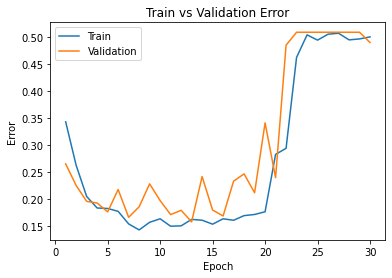

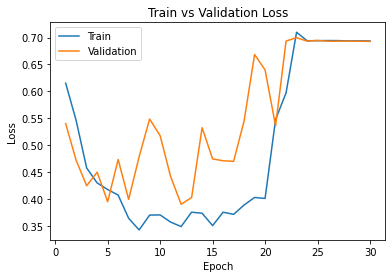

In [ ]:
large_net = LargeNet()
train_net(large_net, batch_size=64, learning_rate=0.1, num_epochs=30)
large_model_path = get_model_name("large", batch_size=64, learning_rate=0.1, epoch=29)
plot_training_curve(large_model_path)

### Part (c) - 1pt

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=512`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *increasing* the batch size.

**Answer**

The large_net was retrained with learning rate of 0.01 and batch_size of 512. The model took least amount of time than the previous large_net models. It took 105.76 seconds. The reason for very short time was because the batch size was much larger than previous runs which mean each epoch was much shorter resulting in a smaller number of iterations. The training curve were plotted for this run. With larger batch size the model seems to be underfitting. Since both the training and validation data did not reach the minimum. To resolve this issue, one has to run many more epochs to achieve the same result as last few runs.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.466, Train loss: 0.6923338621854782 |Validation err: 0.44, Validation loss: 0.6918952614068985
Epoch 2: Train err: 0.413, Train loss: 0.6914851702749729 |Validation err: 0.403, Validation loss: 0.6910877674818039
Epoch 3: Train err: 0.4035, Train loss: 0.6901152096688747 |Validation err: 0.3925, Validation loss: 0.6894860416650772
Epoch 4: Train err: 0.4, Train loss: 0.6876360848546028 |Validation err: 0.393, Validation loss: 0.686403214931488
Epoch 5: Train err: 0.373625, Train loss: 0.6824756488204002 |Validation err: 0.374, Validation loss: 0.6796957552433014
Epoch 6: Train err: 0.364375, Train loss: 0.6726636365056038 |Validation err: 0.3685, Validation loss: 0.6694183051586151
Epoch 7: Train err: 0.36475, Train loss: 0.6583152934908867 |Validation err: 0.3765, Validation loss: 0.659694567322731
Epoch 8: Train err: 0.365, Train loss: 0.6487302668392658 |Validation err: 0.38, Validation

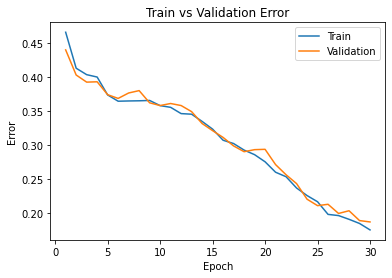

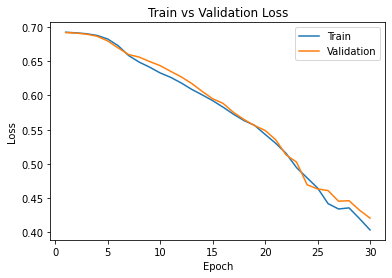

In [ ]:
large_net = LargeNet()
train_net(large_net, batch_size=512, learning_rate=0.01, num_epochs=30)
large_model_path = get_model_name("large", batch_size=512, learning_rate=0.01, epoch=29)
plot_training_curve(large_model_path)

### Part (d) - 1pt

Train `large_net` with all default parameters, including with `learning_rate=0.01`.
Now, set `batch_size=16`. Does the model take longer/shorter to train?
Plot the training curve. Describe the effect of *decreasing* the batch size.

**Answer**

The large_net was retrained with learning rate of 0.01 and batch_size of 16. The model took longest amount of time than the previous large_net models. It took 164.60 seconds. The reason for very long time was because the batch size was much smaller than previous runs which mean each epoch was much longer resulting in large number of iterations. The training curve were plotted for this run. With small batch size the model seems to be overfitting very soon. Both the training and validation data reached minimum error within 2-3 epochs. The loss became very small resulting in NAN.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.34375, Train loss: 0.6175165125727653 |Validation err: 0.2625, Validation loss: 0.540454069852829
Epoch 2: Train err: 0.22325, Train loss: 0.4730004854500294 |Validation err: 0.2035, Validation loss: 0.43918069565296175
Epoch 3: Train err: 0.25525, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 4: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 5: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 6: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 7: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 8: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 9: Train err: 0.502375, Train loss: nan |Validation err: 0.4905, Validation loss: nan
Epoch 10: Train err: 0.502375, Train lo

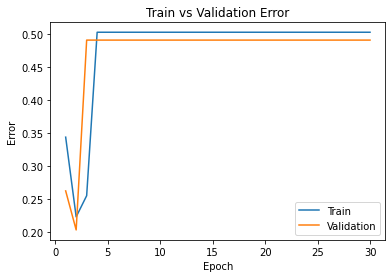

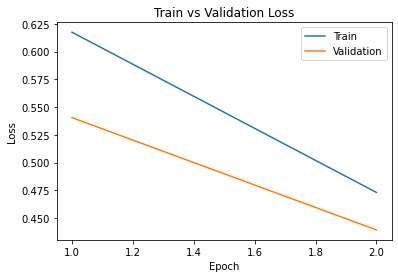

In [ ]:
large_net = LargeNet()
train_net(large_net, batch_size=16, learning_rate=0.01, num_epochs=30)
large_model_path = get_model_name("large", batch_size=16, learning_rate=0.01, epoch=29)
plot_training_curve(large_model_path)

## Part 4. Hyperparameter Search [4 pt]

### Part (a) - 1pt

Based on the plots from above, choose another set of values for the hyperparameters (network, batch_size, learning_rate)
that you think would help you improve the validation accuracy. Justify your choice.

**Answer**

I would choose large_net with batch size of 32, learning rate of 0.001 and epoch of 40. I selected large_net since it shows smooth learning curve which means the model will be reliable in learning. I selected batch size of 32, which is larger than 16 but smaller than 64, this will result in more iteration resulting in the small selected learning rate of 0.001 to learn longer time. This will help the model to learn better and lower the loss and error.

### Part (b) - 1pt

Train the model with the hyperparameters you chose in part(a), and include the training curve.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.43575, Train loss: 0.6917999017238617 |Validation err: 0.4005, Validation loss: 0.6908418952472626
Epoch 2: Train err: 0.391125, Train loss: 0.6885279052257538 |Validation err: 0.3825, Validation loss: 0.6861630422728402
Epoch 3: Train err: 0.369625, Train loss: 0.6772016158103943 |Validation err: 0.3715, Validation loss: 0.6702478244191125
Epoch 4: Train err: 0.364375, Train loss: 0.6550927977561951 |Validation err: 0.377, Validation loss: 0.6561524016516549
Epoch 5: Train err: 0.3655, Train loss: 0.640807126045227 |Validation err: 0.3675, Validation loss: 0.6468247288749331
Epoch 6: Train err: 0.353375, Train loss: 0.6287272845506668 |Validation err: 0.366, Validation loss: 0.6345798534060282
Epoch 7: Train err: 0.347625, Train loss: 0.6155831761360169 |Validation err: 0.352, Validation loss: 0.6205919034897335
Epoch 8: Train err: 0.33025, Train loss: 0.6000627863407135 |Validation err: 

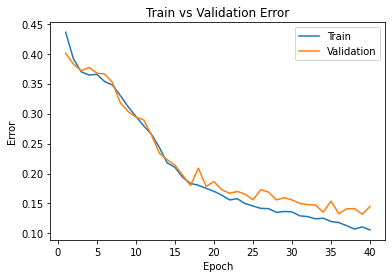

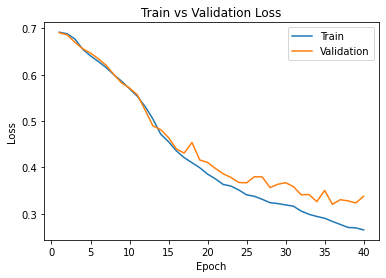

In [ ]:
large_net = LargeNet()
train_net(large_net, batch_size=32, learning_rate=0.001, num_epochs=40)
large_model_path = get_model_name("large", batch_size=32, learning_rate=0.001, epoch=39)
plot_training_curve(large_model_path)

### Part (c) - 1pt

Based on your result from Part(a), suggest another set of hyperparameter values to try. 
Justify your choice.

**Answer**

The selected hyperparameter resulted in the lowest loss and error, 0.15 and 0.35, respectively. However, the curve show that the model is underfitting. This means that either the learning rate should be increased slightly, or epochs needs to be increased. I would now try same large_net, with same batch size as above (32) and slightly higher learning rate 0.003 and more epochs= 50.

### Part (d) - 1pt

Train the model with the hyperparameters you chose in part(c), and include the training curve.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.432375, Train loss: 0.6870352714061737 |Validation err: 0.382, Validation loss: 0.6722288708838206
Epoch 2: Train err: 0.352125, Train loss: 0.6363999593257904 |Validation err: 0.339, Validation loss: 0.6183718859203278
Epoch 3: Train err: 0.312375, Train loss: 0.5932396280765534 |Validation err: 0.283, Validation loss: 0.5635768113628267
Epoch 4: Train err: 0.258, Train loss: 0.5270338064432144 |Validation err: 0.2335, Validation loss: 0.49129246009720695
Epoch 5: Train err: 0.223125, Train loss: 0.47439719367027283 |Validation err: 0.2465, Validation loss: 0.49285770834438386
Epoch 6: Train err: 0.202375, Train loss: 0.44282402843236923 |Validation err: 0.19, Validation loss: 0.4240438871913486
Epoch 7: Train err: 0.181375, Train loss: 0.4066297354698181 |Validation err: 0.178, Validation loss: 0.40513604832073996
Epoch 8: Train err: 0.168375, Train loss: 0.3868340120911598 |Validation e

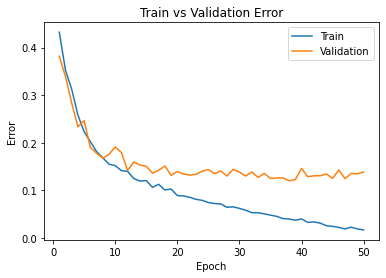

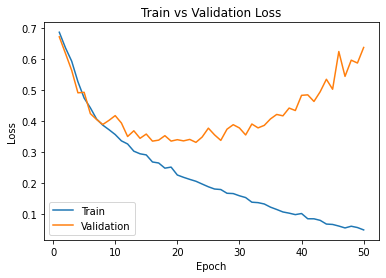

In [ ]:
large_net = LargeNet()
train_net(large_net, batch_size=32, learning_rate=0.003, num_epochs=50)
large_model_path = get_model_name("large", batch_size=32, learning_rate=0.003, epoch=49)
plot_training_curve(large_model_path)

## Part 4. Evaluating the Best Model [9 pt]


### Part (a) - 1pt

Choose the **best** model that you have so far. This means choosing the best model checkpoint,
including the choice of `small_net` vs `large_net`, the `batch_size`, `learning_rate`, 
**and the epoch number**.

Modify the code below to load your chosen set of weights to the model object `net`.

In [ ]:
large_net = LargeNet()
model_path = get_model_name(large_net.name, batch_size=32, learning_rate=0.003, epoch=16)
state = torch.load(model_path)
large_net.load_state_dict(state)

<All keys matched successfully>

### Part (b) - 2pt

Justify your choice of model from part (a).

**Answer**

I selected large_net for smooth learning curve resulting in more reliability. Batch size of 32, learning rate of 0.03 since that resulted in the lowest validation error of the model. I selected epoch 16 as its the lowest validation error and validation loss among all model trained.

### Part (c) - 2pt

Using the code in Part 0, any code from lecture notes, or any code that you write,
compute and report the **test classification error** for your chosen model.

In [ ]:
# If you use the `evaluate` function provided in part 0, you will need to 
# set batch_size > 1
train_loader, val_loader, test_loader, classes = get_data_loader(
    target_classes=["car", "truck"], 
    batch_size=32)

In [ ]:
def predict_net(net, batch_size=64):
    ########################################################################
    target_classes = ["car", "truck"]
    ########################################################################
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(1000)
    ########################################################################
    # Obtain the PyTorch data loader objects to load batches of the datasets
    train_loader, val_loader, test_loader, classes = get_data_loader(
            target_classes, batch_size)
    ########################################################################
    criterion = nn.BCEWithLogitsLoss()
    start_time = time.time()
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0
    for i, data in enumerate(test_loader, 0):
        inputs, labels = data
        labels = normalize_label(labels)  # Convert labels to 0/1
        outputs = net(inputs)
        loss = criterion(outputs, labels.float())
        corr = (outputs > 0.0).squeeze().long() != labels
        total_err += int(corr.sum())
        total_loss += loss.item()
        total_epoch += len(labels)
    err = float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)
    print(("Test error: {}, Test loss: {} ").format(err,loss))
    print('Finished Testing')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    
    return err, loss

In [ ]:
Testerr, Testloss = predict_net(large_net, batch_size=32)

Files already downloaded and verified
Files already downloaded and verified
Test error: 0.14, Test loss: 0.32592364507062094 
Finished Testing
Total time elapsed: 0.86 seconds


### Part (d) - 2pt

How does the test classification error compare with the **validation error**?
Explain why you would expect the test error to be *higher* than the validation error.

**Answer**

The test classification error is 0.14 and Test loss is 0.3259. The validation classification error is 0.136 and Validation loss is 0.3350. The test error was high as the model has never seen the data before. Whereas, while we were training the model the validation dataset was used to evaluate the training performance and our aim during was to lower the validation error. therefore, it is expected the validation error to be the lower than testing error.

### Part (e) - 2pt

Why did we only use the test data set at the very end?
Why is it important that we use the test data as little as possible?

**Answer**

The test data was used at the very end because test data is something, we want to evaluate the fully trained model on. This mean while training the model should not be able to use any of the testing data, if it does then it will learn on the testing data resulting in an overfit on the model. Testing data is the data which represent real world data which the fully trained model will see, therefore in order to test the fully trained model it’s important that the fully trained model never use the testing data while training.

## Part 5. Fully-Connected Linear ANN vs CNN [3 pt]

Test out a 3-layer linear fully-connected ANN architecture (see simpleANN below). You should explore different hyperparameter settings to determine how well you can do on the validation dataset. Once satisified with the performance, you may test it out on the test data.

How does the your best CNN model compare with an 2-layer linear ANN model (no convolutional layers) on classifying car and truck images?

**Answer**

The ANN was able to achieve the minimum Validation loss of 0.518 and minimum Validation error of 0.252, along with Test error of 0.253 and Test loss of 0.511. Whereas the best performing CNN was able to achieve Validation err of 0.136, Validation loss of 0.335 and Test error of 0.14, Test loss of 0.3259. From the results above, it can clearly be seen that CNN performance is superior to ANN performance in terms of image classification. In addition of this ANN is more computationally intensive if the image size was a little bit larger which will result it more trainable weights. Whereas CNN can handle larger size images fairly well.  

In [ ]:
class simpleANN(nn.Module):
    def __init__(self):
        super(simpleANN, self).__init__()
        self.name = "simple"
        self.fc1 = nn.Linear(32 * 32 * 3, 100)
        self.fc2 = nn.Linear(100, 20)
        self.fc3 = nn.Linear(20, 1)

    def forward(self, x):
        x = x.view(-1, 32*32*3)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

Files already downloaded and verified
Files already downloaded and verified
Epoch 1: Train err: 0.37975, Train loss: 0.668317286491394 |Validation err: 0.3645, Validation loss: 0.6549310088157654
Epoch 2: Train err: 0.344125, Train loss: 0.6403906500339508 |Validation err: 0.3515, Validation loss: 0.63677465064185
Epoch 3: Train err: 0.334625, Train loss: 0.620502564907074 |Validation err: 0.335, Validation loss: 0.620124738367777
Epoch 4: Train err: 0.32, Train loss: 0.6048740239143372 |Validation err: 0.321, Validation loss: 0.6085528627274528
Epoch 5: Train err: 0.305875, Train loss: 0.5925077434778213 |Validation err: 0.313, Validation loss: 0.5996260993064396
Epoch 6: Train err: 0.298625, Train loss: 0.5806540424823761 |Validation err: 0.298, Validation loss: 0.5906211265495845
Epoch 7: Train err: 0.289, Train loss: 0.5691824065446853 |Validation err: 0.2955, Validation loss: 0.5834800927411943
Epoch 8: Train err: 0.279125, Train loss: 0.5582527091503143 |Validation err: 0.288, Va

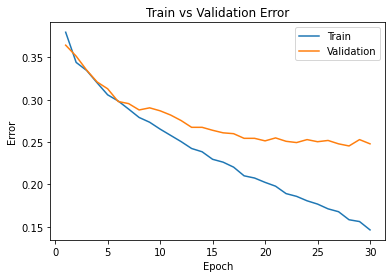

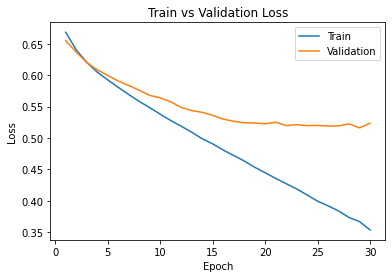

In [ ]:
simple_net = simpleANN()
train_net(simple_net, batch_size=32, learning_rate=0.0004, num_epochs=30)
simpleANN_model_path = get_model_name("simple", batch_size=32, learning_rate=0.0004, epoch=29)
plot_training_curve(simpleANN_model_path)

In [ ]:
simple_net = simpleANN()
model_path = get_model_name(simple_net.name, batch_size=32, learning_rate=0.0004, epoch=26)
state = torch.load(model_path)
simple_net.load_state_dict(state)

<All keys matched successfully>

In [ ]:
Testerr, Testloss = predict_net(simple_net, batch_size=32)

Files already downloaded and verified
Files already downloaded and verified
Test error: 0.253, Test loss: 0.5110114604707748 
Finished Testing
Total time elapsed: 0.72 seconds


### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
%%shell
jupyter nbconvert --to html LAB_1_ANN_and_PyTorch.ipynb

[NbConvertApp] Converting notebook LAB_1_ANN_and_PyTorch.ipynb to html
[NbConvertApp] Writing 1013448 bytes to LAB_1_ANN_and_PyTorch.html


(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus

https://colab.research.google.com/drive/1rEq-BD0MjLQTv01s4BBZjQp63d5Qy46t?usp=sharing

Link to Collab file: https://colab.research.google.com/drive/1rEq-BD0MjLQTv01s4BBZjQp63d5Qy46t?usp=sharing